In [2]:
import pandas as pd
import numpy as np
import requests
import io

In [5]:
url="https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/cc_fraud_small.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-4.981898,-0.121752,-2.229536,-0.090148,-0.760316,-1.055487,-0.113240,0.165242,0.696125,0.938089,...,-1.425822,0.039089,-0.794481,0.709382,0.059621,-0.189853,0.135066,0.478518,-1.601432,0
1,1.775576,-0.384130,-0.571485,1.510871,-0.116837,0.251088,-0.143451,0.031212,1.058218,-0.085883,...,-0.043190,-0.471701,-1.255005,0.379358,0.540215,-0.306870,-1.140023,0.040743,-0.008218,0
2,1.957670,0.027428,-1.609890,0.474699,0.112497,-1.161660,0.209604,-0.316889,0.897800,-0.883267,...,-0.073054,-0.216508,-0.376847,0.147106,-0.174243,-0.052510,-0.087339,-0.003823,-0.015250,0
3,1.937051,-0.038394,-1.750883,1.136675,0.632473,0.196431,-0.140388,0.111568,0.606069,-0.113442,...,-0.168858,-0.093900,-0.258714,-0.034150,-1.611562,0.073711,-0.627807,0.028540,-0.031252,0
4,1.533024,-1.094642,0.243022,-1.722374,-1.106770,0.075798,-1.211126,0.054730,-1.894169,1.587615,...,-0.276517,-0.393277,-0.829669,0.021092,-0.887879,0.249952,-0.355318,0.035725,0.008283,0


In [10]:
df.iloc[:,28]

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Class, Length: 2000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
df.columns


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [19]:
df.loc[:,"V1"]

0       -4.981898
1        1.775576
2        1.957670
3        1.937051
4        1.533024
          ...    
1995    -3.499108
1996     0.054682
1997    -1.426623
1998   -12.833631
1999   -12.835760
Name: V1, Length: 2000, dtype: float64

In [25]:
scaler = StandardScaler()
df_X=df.drop(["Class"],axis=1)
scaler.fit(df_X)
X=scaler.transform(df_X)
print(scaler.transform(df_X))

[[-0.47812664 -0.50034612  0.19738084 ...  0.22328501  0.40481704
  -2.8087453 ]
 [ 0.76137227 -0.57183771  0.46661972 ... -2.38434279 -0.02089999
  -0.06562197]
 [ 0.79477301 -0.45969804  0.29800054 ... -0.23154616 -0.06423865
  -0.07772948]
 ...
 [ 0.17400446  0.66141832 -1.03259846 ...  0.97376513  1.86227518
   1.17373993]
 [-1.91834155  1.57878995 -2.76812096 ... -0.07357051 -2.39520372
  -1.29209353]
 [-1.91873191  1.32425028 -1.51720695 ...  0.31031683 -0.85567883
  -0.94855733]]


In [27]:
Y=df.loc[:,"Class"]
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=44)

In [71]:
recall_=[]
precision_=[]
accuracy_=[]

for k in range(50):
    neigh = KNeighborsClassifier(n_neighbors=k+1,p=2)
    neigh.fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    conf_mat=confusion_matrix(y_test, y_pred)
    accuracy=(conf_mat[0][0]+conf_mat[1][1])/(sum(sum(conf_mat)))
    recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
    precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
    recall_.append(recall)
    precision_.append(precision)
    accuracy_.append(accuracy)
    

In [92]:
k=np.linspace(1,50,50)
print(len(k))

50


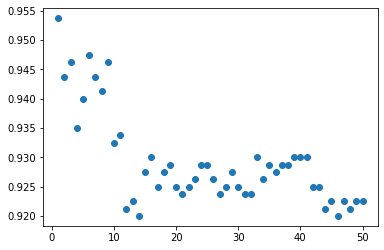

In [73]:
plt.scatter(k,accuracy_)

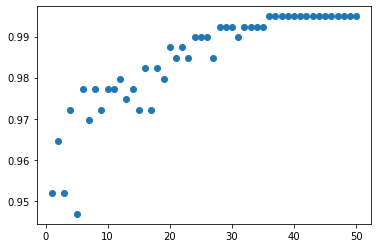

In [74]:
plt.scatter(k,precision_)

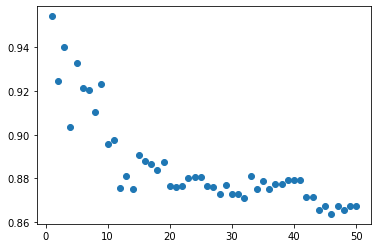

In [75]:
plt.scatter(k,recall_)

In [63]:
# with given plots accuracy is highest with k=1
# precision is increasing with higher k
# recall is decreasing with higher k
# I would like k=1 as it has highest accuracy and recall with precision being worst.

In [ ]:
#next I tried using different p for classifier which is simply l1,l2,l3 distance and so on

In [78]:
recall_=[]
precision_=[]
accuracy_=[]


for j in range(10):
    for k in range(50):
        neigh = KNeighborsClassifier(n_neighbors=k+1,p=j+1)
        neigh.fit(X_train,y_train)
        y_pred=neigh.predict(X_test)
        conf_mat=confusion_matrix(y_test, y_pred)
        accuracy=(conf_mat[0][0]+conf_mat[1][1])/(sum(sum(conf_mat)))
        recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
        precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
        recall_.append(recall)
        precision_.append(precision)
        accuracy_.append(accuracy)

In [82]:
len(accuracy_[0:50])

50

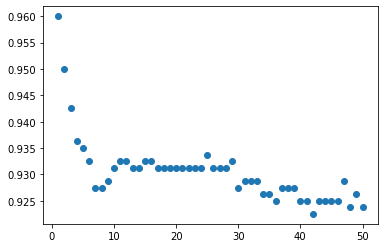

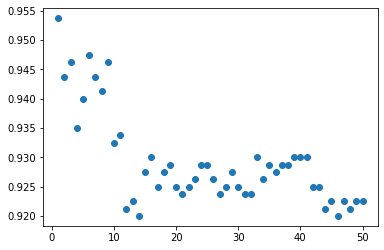

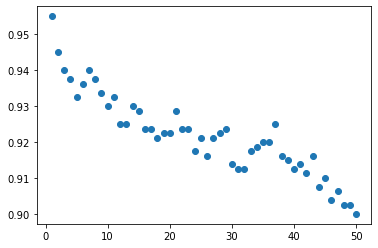

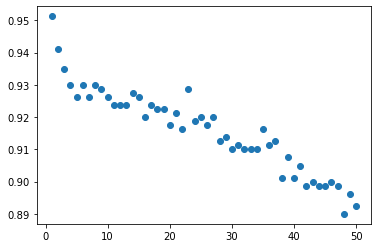

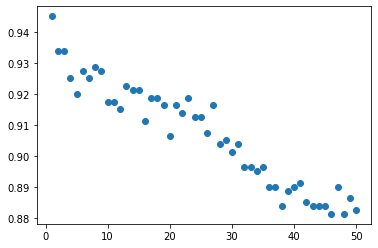

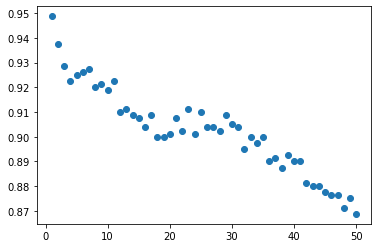

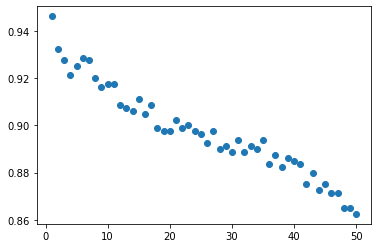

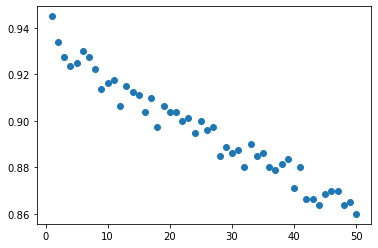

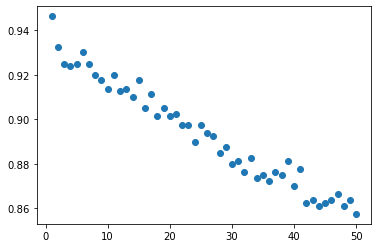

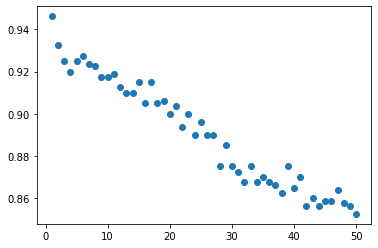

In [96]:

for j in range(10):
    y_ax=accuracy_[j*50:(50*j)+50]
    #print(len(y_ax),len(k))
    plt.figure(j+1)
    plt.scatter(k,y_ax)
    j=+1
    

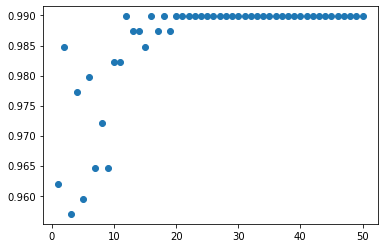

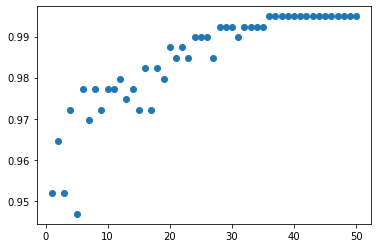

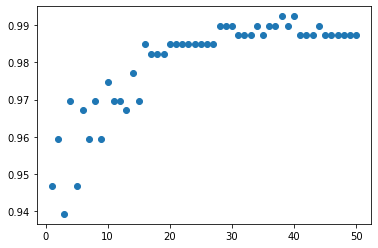

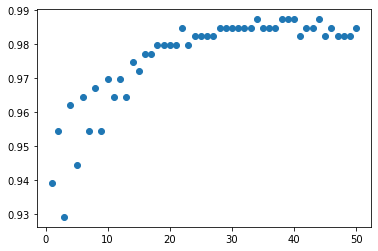

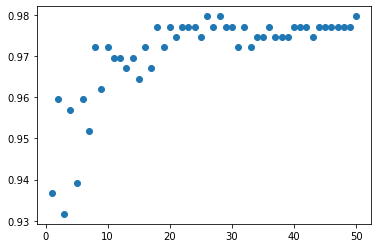

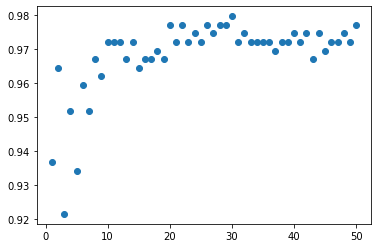

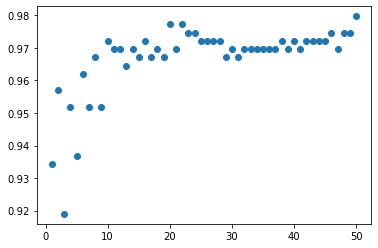

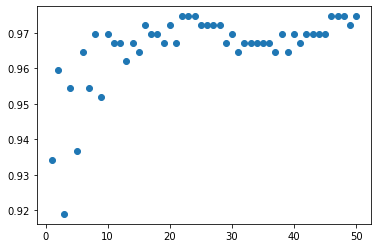

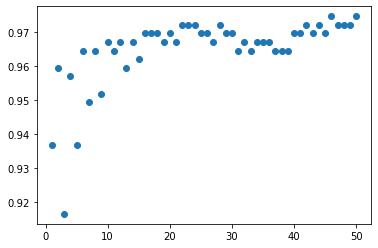

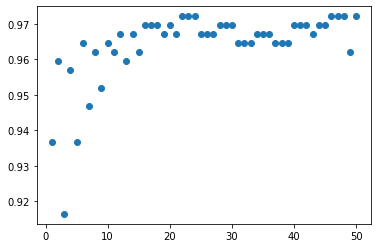

In [97]:
for j in range(10):
    y_ax=precision_[j*50:(50*j)+50]
    #print(len(y_ax),len(k))
    plt.figure(j+1)
    plt.scatter(k,y_ax)
    j=+1

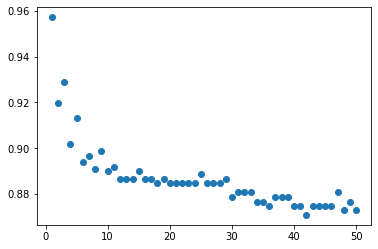

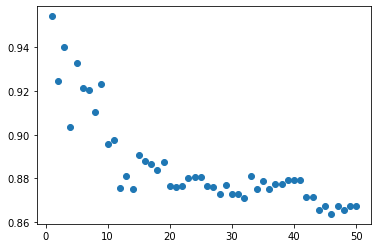

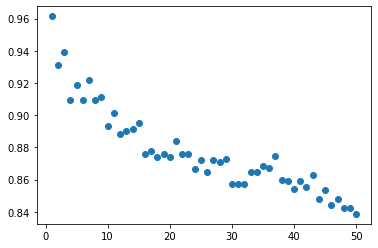

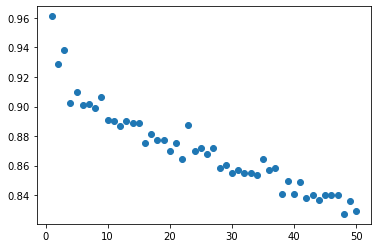

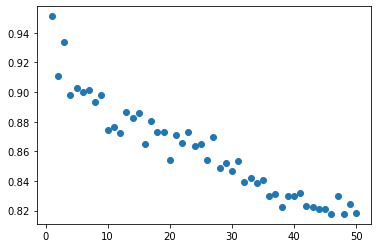

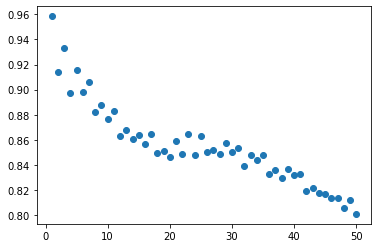

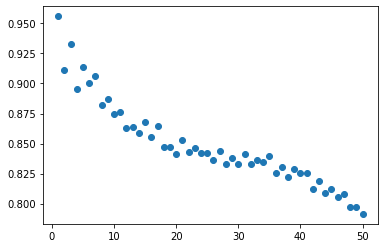

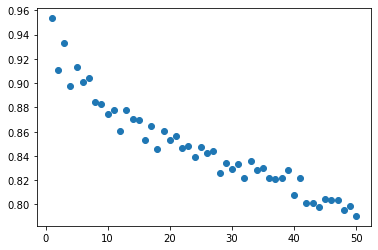

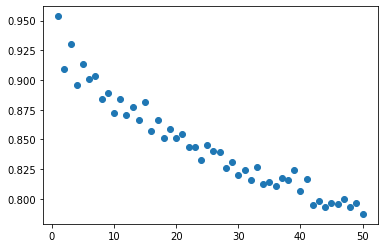

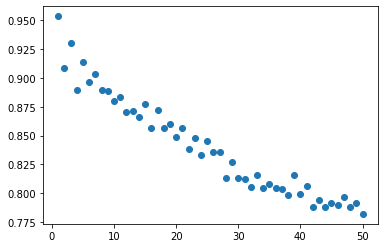

In [98]:
for j in range(10):
    y_ax=recall_[j*50:(50*j)+50]
    #print(len(y_ax),len(k))
    plt.figure(j+1)
    plt.scatter(k,y_ax)
    j=+1

In [ ]:
#it seems L1 distance is best for accuracy with n_neighbourss=2